------ Chapter 12 of MLAPP: Generalized Linear Models ------

@author Zijie ZHONG / Zigit CHUNG

@date 7 nov 2021

In this demo I will try to re-obtain some distributions by modifying the parameters in the general formula for the General Linear Models family. 

List: Linear Regression, Binomial Regression, Poisson

Similar to the demo of the ExpFam (ref:ExpFam_general.ipynb), in each block of code, I modify the form of the functions in the general formula for the GLM.

Attention: the convention of the function follows the book MLAPP but not the Wikipedia.

[Reference](https://en.wikipedia.org/wiki/Generalized_linear_model)

Linear Regression

I hope you agree that we got the same distribution as a Normal distribution : )

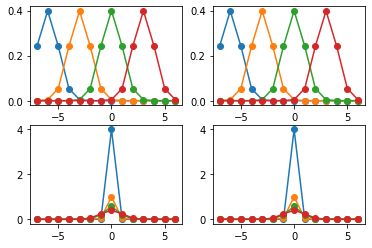

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

fig, ax = plt.subplots(2, 2)
# definition of the formula
# define the x_set
y_set_len = 14
y_left = -7
y_set = np.arange(y_left,y_left+y_set_len,1)
# define the parameters
n = 0
mu = 2
sigma = 1
w = np.array([1]) # the weight vector of the parameters
x = np.array([mu]) # in normal, there's only one parameter mu because sigma is a default parameter of GLMs
# the x and mu will be redefined in the for loop
# I wrote it here just to be more clear

def hFunc(x,sigma):
    return 1/(m.sqrt(2*m.pi*sigma**2))
def etaFunc(w,x):
    return np.dot(w,x)
def AFunc(y,eta):
    return (y**2+eta**2)/2

# define the pdf and pdf2 array to store the result of calculation
pdf = np.zeros(y_set_len)
pdf2 = np.zeros(y_set_len)
# plot the pdf generated 2 ways 
# note that there are 2 parameters in normal distribution, we add 2 figures
# figure 1 and 2 correspond to fix mu, change sigma
# figure 3 and 4 correspond to fix sigma, change mu

for mu in np.arange(-6,6,3):
    sigma = 1
    x = np.array([mu])
    for y in y_set:
        h=hFunc(x,sigma)
        eta = etaFunc(w,x)
        A = AFunc(y,eta)
        # FEF
        temp1 = np.dot(y,eta)
        pdf[y-y_left] = np.dot(h, (np.exp(((temp1-A)/(sigma**2)))))
        ## original form
        pdf2[y-y_left] = np.dot(h,  np.exp((-1/2)*(((y-x[0])/sigma)**2)))
    ax[0,0].plot(y_set,pdf,'-o')
    ax[0,1].plot(y_set,pdf2,'-o')
for sigma in np.arange(0.1,1.2,0.3):
    mu = 0
    x = np.array([mu])
    for y in y_set:
        h=hFunc(x,sigma)
        eta = etaFunc(w,x)
        A = AFunc(y,eta)
        # FEF
        temp1 = np.dot(y,eta)
        pdf[y-y_left] = np.dot(h, (np.exp(((temp1-A)/(sigma**2)))))
        ## original form of Normal distribution
        pdf2[y-y_left] = np.dot(h,  np.exp((-1/2)*(((y-x[0])/sigma)**2)))
    ax[1,0].plot(y_set,pdf,'-o')
    ax[1,1].plot(y_set,pdf2,'-o')
plt.show()

Binomial

In this model, we fit the weight of parameters (w) using the MLE. As it is a member of GLMs, the MLE is attained when y = mu = sigmoid(eta) = sigmoid(w.x)

**However, the w obtained by MLE doesn't not give the result as Binomial distribution. I can't explain the reason.**

/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_86123/1440171201.py:41: RuntimeWarning: divide by zero encountered in log
  w=np.log(y)/mu
/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_86123/1440171201.py:41: RuntimeWarning: divide by zero encountered in log
  w=np.log(y)/mu
/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_86123/1440171201.py:41: RuntimeWarning: divide by zero encountered in log
  w=np.log(y)/mu


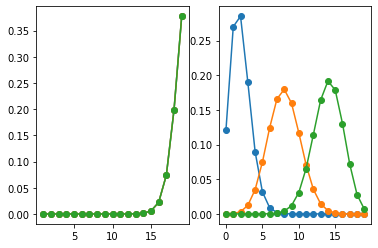

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

fig, ax = plt.subplots(1, 2)
# definition of the formula
# define the x_set
y_set_len = 20
y_left = 0
y_set = np.arange(y_left,y_left+y_set_len,1)
# define the parameters
n = 0
mu = 0
N = y_set_len
w = np.array([1]) # the weight vector of the parameters
x = np.array([mu]) # in normal, there's only one parameter mu because sigma is a default parameter of GLMs
# the x and mu will be redefined in the for loop
# I wrote it here just to be more clear

def hFunc(N,y):
    return np.log(m.comb(N,y))
def etaFunc(w,x):
    return np.dot(w,x)
def AFunc(y,eta):
    return N*np.log(1+np.exp(eta))
def sigmoid(x):
    return 1/(1+np.exp(-x))

# define the pdf and pdf2 array to store the result of calculation
pdf = np.zeros(y_set_len)
pdf2 = np.zeros(y_set_len)
# plot the pdf generated 2 ways 
# note that there are 2 parameters in normal distribution, we add 2 figures
# figure 1 and 2 correspond to fix mu, change sigma
# figure 3 and 4 correspond to fix sigma, change mu

for mu in np.arange(0.1,0.9,0.3):
    sigma = 1
    x = np.array([mu])
    for y in y_set:
        w=np.log(y)/mu
        h=hFunc(N,y)
        eta = etaFunc(w,x)
        A = AFunc(y,eta)
        # FEF
        temp1 = np.dot(y,eta)
        
        log_pdf = temp1-A+h
        pdf[y-y_left] = np.exp(log_pdf)
        ## original form
        pdf2[y-y_left] = m.comb(N,y)* (mu**y) * (1-mu)**(N-y)
    ax[0].plot(y_set,pdf,'-o')
    ax[1].plot(y_set,pdf2,'-o')

plt.show()

Poisson

**We encountered the same difficulty here, the MLE doesn't not give the same distribution as the Poisson distribution.**

/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_86123/3870201580.py:42: RuntimeWarning: divide by zero encountered in log
  w=np.log(y)/mu
/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_86123/3870201580.py:42: RuntimeWarning: divide by zero encountered in log
  w=np.log(y)/mu
/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_86123/3870201580.py:42: RuntimeWarning: divide by zero encountered in log
  w=np.log(y)/mu


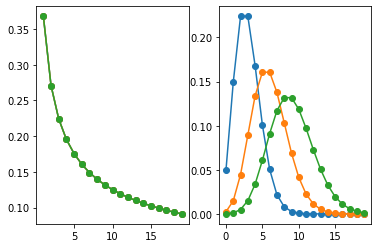

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

fig, ax = plt.subplots(1, 2)
# definition of the formula
# define the x_set
y_set_len = 20
y_left = 0
y_set = np.arange(y_left,y_left+y_set_len,1)
# define the parameters
n = 0
mu = 0
N = y_set_len
w = np.array([1]) # the weight vector of the parameters
x = np.array([mu]) # in normal, there's only one parameter mu because sigma is a default parameter of GLMs
# the x and mu will be redefined in the for loop
# I wrote it here just to be more clear

def hFunc(N,y):
    return -np.log(m.factorial(y))
def etaFunc(w,x):
    return np.dot(w,x)
def AFunc(y,eta):
    return np.exp(eta)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# define the pdf and pdf2 array to store the result of calculation
pdf = np.zeros(y_set_len)
pdf2 = np.zeros(y_set_len)
# plot the pdf generated 2 ways 
# note that there are 2 parameters in normal distribution, we add 2 figures
# figure 1 and 2 correspond to fix mu, change sigma
# figure 3 and 4 correspond to fix sigma, change mu

for mu in np.arange(3,12,3):
    sigma = 1
    x = np.array([mu])
    # end of training
    for y in y_set:
        w=np.log(y)/mu
        h=hFunc(N,y)
        eta = etaFunc(w,x) 
        A = AFunc(y,eta)
        # FEF
        temp1 = np.dot(y,eta)
        log_pdf = temp1-A+h
        pdf[y-y_left] = np.exp(log_pdf)
        ## original form
        pdf2[y-y_left] = (mu**y*np.exp(-mu))/(m.factorial(y))
    ax[0].plot(y_set,pdf,'-o')
    ax[1].plot(y_set,pdf2,'-o')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
fig, ax = plt.subplots(1, 2)

def hFunc(N,y):
    return -np.log(m.factorial(y))
def etaFunc(w,x):
    return np.dot(w,x)
def AFunc(y,eta):
    return np.exp(eta)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def NLL(w,y,eta):
    return (-1)*(np.dot(y,eta)-AFunc(y,eta))
def grad(y,eta,x):
    return (y-np.exp(eta))*x[0]
